In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import SSE

from IPython.display import Image

In [2]:
# Circuit definition

VT = 26e-3  # Thermal voltage
Vdd = 1.1*VT   # Power voltage

C0 = 0.16   # unit of capacitance (1V/qe = 0.16af)
Ci = 50/C0  # gate capacitance of 50 af
Co = Ci/100  # output capacitance of 50 af

cap = []
dev = []
src = []

src.append( [1,Vdd] )   # Positive source
src.append( [2,-Vdd] )  # Negative source

cap.append( ((1,3), Ci) ) # 1st stage pmosfet gate capacitance
cap.append( ((2,3), Ci) ) # 1st stage nmosfet gate capacitance
cap.append( ((1,4), Co) ) # 1st stage pmosfet output capacitance
cap.append( ((2,4), Co) ) # 1st stage nmosfet output capacitance

cap.append( ((1,4), Ci) ) # 2nd stage pmosfet gate capacitance
cap.append( ((2,4), Ci) ) # 2nd stage nmosfet gate capacitance
cap.append( ((1,3), Co) ) # 2nd stage pmosfet output capacitance
cap.append( ((2,3), Co) ) # 2nd stage nmosfet output capacitance

# I add the mosfet transistors. I take I0=1 and VT=0, since that only defines the time scale. 
# Also, I take n=1 for simplicity.

dev.append( ((1,4), SSE.mosfet(1, 0, 1, VT, [(1,3)])) )   # 1st stage pmosfet 
dev.append( ((4,2), SSE.mosfet(1, 0, 1, VT, [(3,2)])) )   # 1st stage nmosfet

dev.append( ((1,3), SSE.mosfet(1, 0, 1, VT, [(1,4)])) )   # 2nd stage pmosfet 
dev.append( ((3,2), SSE.mosfet(1, 0, 1, VT, [(4,2)])) )   # 2nd stage nmosfet

circuit = SSE.circuit(cap, dev, src)



In [3]:
%%time
# Simulation 

sim = SSE.simulation(circuit)
sim.run_tl(.2,50000)

for k in range(4):
    print(np.mean(sim.jumps[k,:]))

# output voltage
Vout = np.array([sim.circuit.V(sim.traj[:,k:k+1], sim.times[k])[3-1] for k in range(len(sim.times))])

0.21758487033948135
0.2176568706274825
0.21772087088348355
0.21765287061148245
CPU times: user 21.5 s, sys: 99.6 ms, total: 21.6 s
Wall time: 21.5 s


<IPython.core.display.Javascript object>


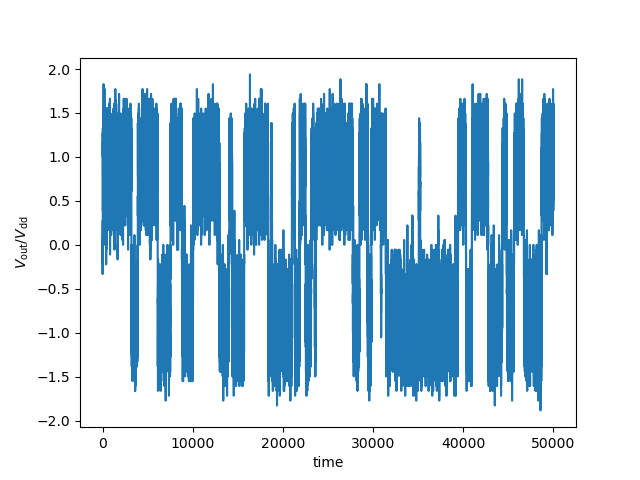

<IPython.core.display.Javascript object>


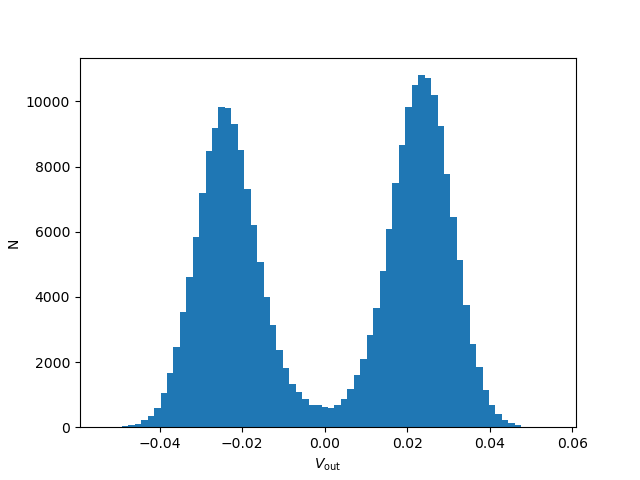

Text(0, 0.5, 'N')

In [14]:
plt.figure()
plt.plot(sim.times, Vout/Vdd)
plt.xlabel('time')
plt.ylabel('$V_\mathrm{out}/V_\mathrm{dd}$')


plt.figure()
plt.hist(Vout,bins=70)
plt.xlabel('$V_\mathrm{out}$')
plt.ylabel('N')